In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r'C:\Users\GamingWorld\Health_Sleep_Statistics.csv')
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [5]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [9]:
df.drop(['User ID'], axis = 1,inplace= True)

KeyError: "['User ID'] not found in axis"

In [10]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [11]:
## AGE VS SLEEP


In [15]:
age_sleep_quality_corr = df[['Age', 'Sleep Quality']].corr()
age_sleep_quality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


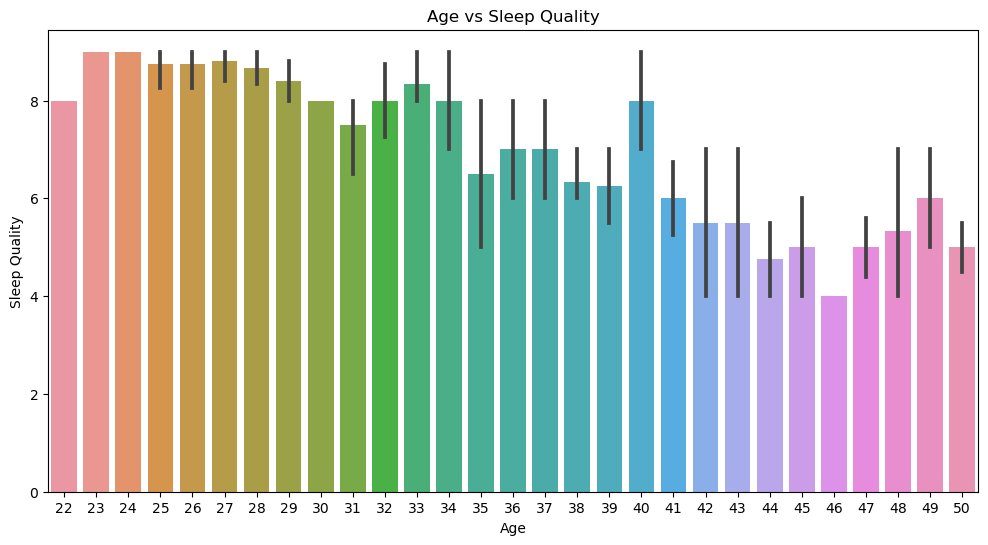

In [17]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Age', y = 'Sleep Quality', data =df)
plt.title("Age vs Sleep Quality")
plt.show()

In [18]:
## PHYSICAL ACTIVITY VS SLEEP QUALITY

In [ ]:
df['Phsysical Activity Level'].head()

<Axes: xlabel='Gender', ylabel='Sleep Quality'>

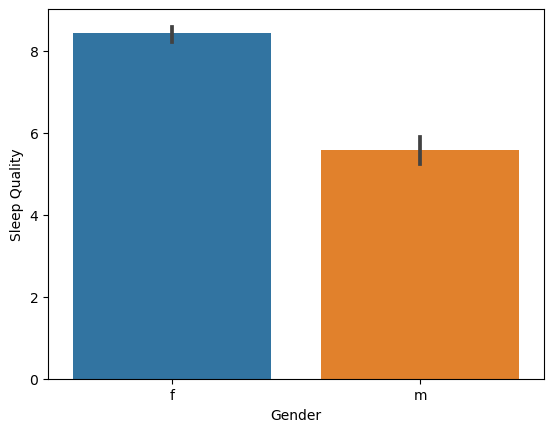

In [19]:
sns.barplot(x = "Gender" , y= "Sleep Quality", data=df)

<Axes: xlabel='Physical Activity Level', ylabel='Sleep Quality'>

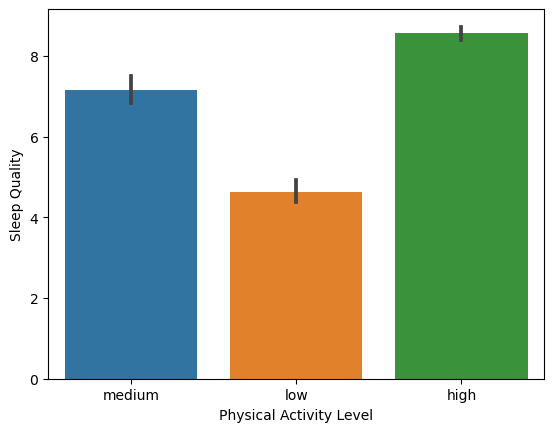

In [20]:
sns.barplot(x = "Physical Activity Level" , y= "Sleep Quality", data=df)

In [21]:
custom_codes = {"low" : 1, "medium" : 2, "high" : 3}

df['Physical Activity Level'] = df['Physical Activity Level'].map(custom_codes)
df['Physical Activity Level'].head()

0    2
1    1
2    3
3    1
4    3
Name: Physical Activity Level, dtype: int64

In [ ]:
## Averiguemos las t y p valores para Sleep quality vs genre & Physical Activity vs gender

sns.barplot(x = "Gender" , y= "Sleep Quality", data=df)

In [22]:
from scipy import stats

In [23]:
sleep_quality_males = df[df['Gender'] == 'm']['Sleep Quality']
sleep_quality_females = df[df['Gender'] == 'f']['Sleep Quality']

physical_activity_males = df[df['Gender'] == 'm']['Physical Activity Level']
physical_activity_females = df[df['Gender'] == 'f']['Physical Activity Level']

In [24]:
t_sleep_quality, p_sleep_quality = stats.ttest_ind(sleep_quality_males, sleep_quality_females)

print(f"t_stats value for sleep quality vs gender : {t_sleep_quality:2f}")
print(f"p_stats value for sleep quality vs gender : {p_sleep_quality:2f}")


t_stats value for sleep quality vs gender : -14.320329
p_stats value for sleep quality vs gender : 0.000000


In [25]:
# Ambas son importantes features para nosotros a la ohra del analisis

In [26]:
## time sleep & waking up vs sleep quality

In [28]:
df["Bedtime"].head()

0    23:00
1    00:30
2    22:45
3    01:00
4    23:30
Name: Bedtime, dtype: object

In [30]:
#Cambiar los valores de tiempo a Numero para luego evaluar
def sleep_duration_hours_helper_function(str_time):
    h = int(str_time.split(':')[0])
    m = int(str_time.split(':')[1])
    return h + m/60
    
df['Bedtime'] = df['Bedtime'].apply(sleep_duration_hours_helper_function)
df['Wake-up Time'] = df['Wake-up Time'].apply(sleep_duration_hours_helper_function)

df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no


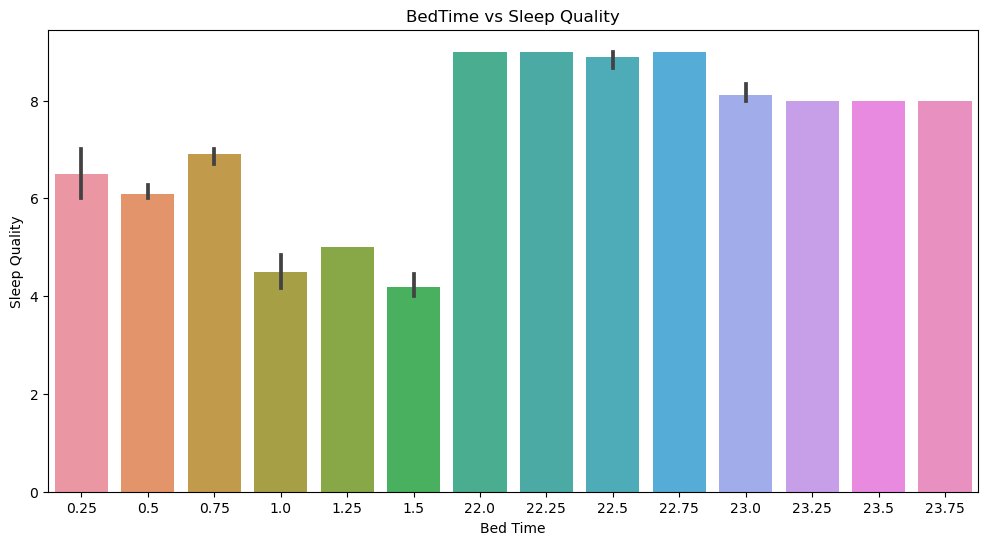

In [31]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Bedtime', y = 'Sleep Quality', data = df)
plt.xlabel("Bed Time")
plt.ylabel("Sleep Quality")
plt.title("BedTime vs Sleep Quality")
plt.show()

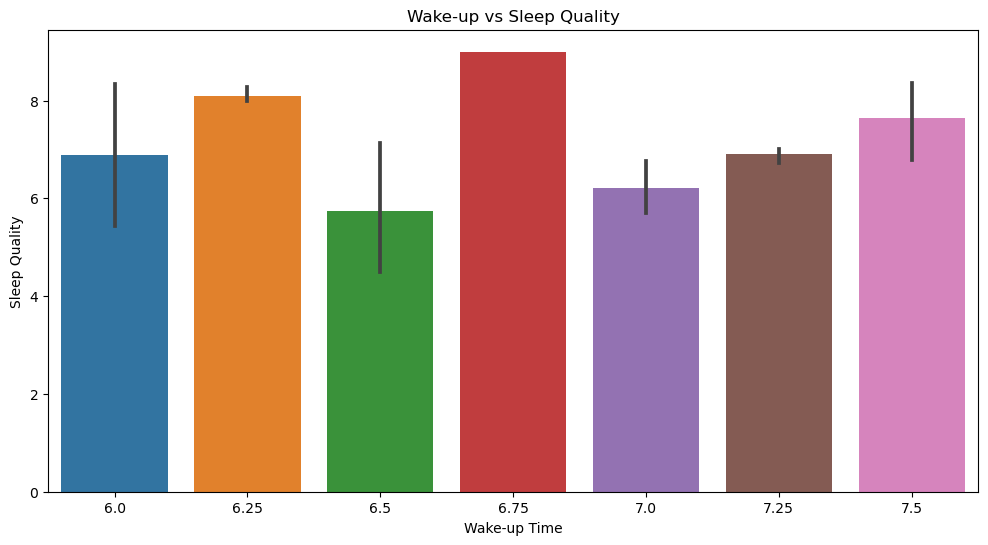

In [32]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Wake-up Time', y = 'Sleep Quality', data = df)
plt.xlabel("Wake-up Time")
plt.ylabel("Sleep Quality")
plt.title("Wake-up vs Sleep Quality")
plt.show()

In [33]:
df['Sleep Duration Hours'] = (df['Wake-up Time'] - df['Bedtime']) % 24
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


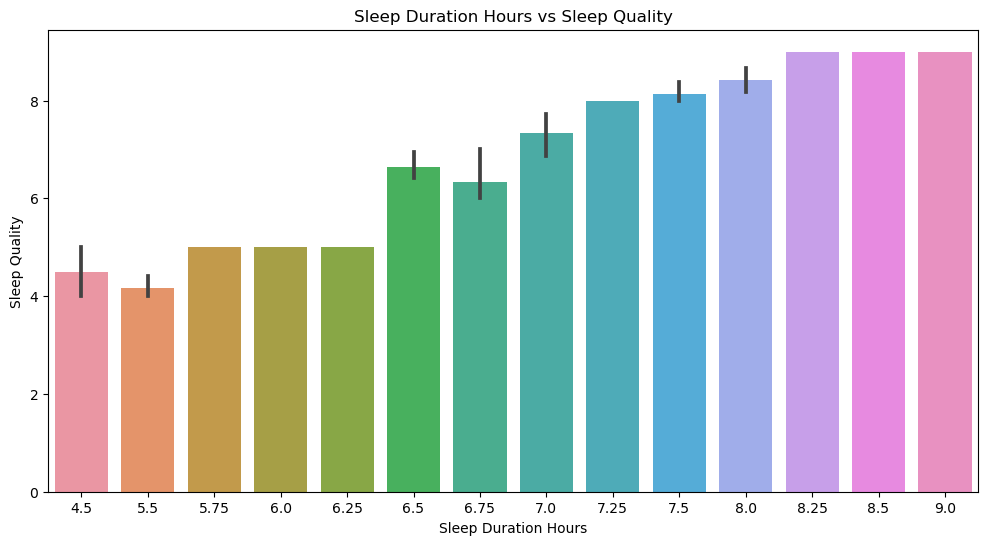

In [34]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df)
plt.xlabel("Sleep Duration Hours")
plt.ylabel("Sleep Quality")
plt.title("Sleep Duration Hours vs Sleep Quality")
plt.show()

In [37]:
X = df[['Sleep Duration Hours']]
Y = df['Sleep Quality']

model = LinearRegression()

model.fit(X, Y)

LinearRegression()

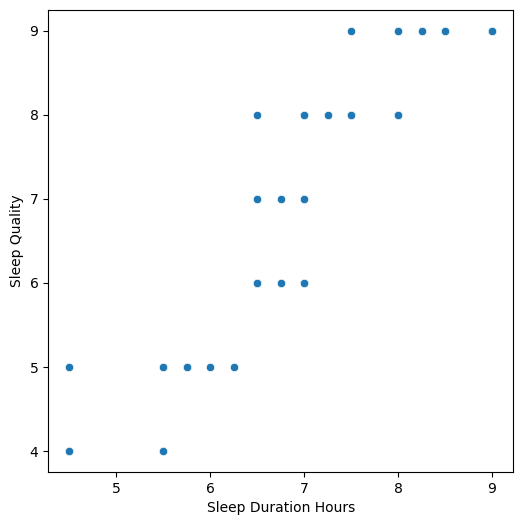

In [38]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df)
plt.show()

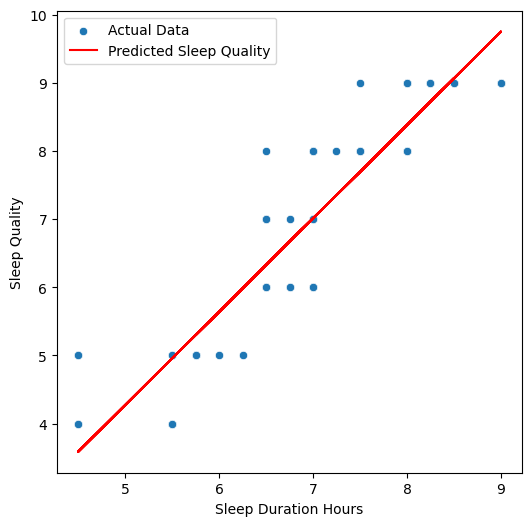

In [39]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Sleep Duration Hours', y = 'Sleep Quality', data = df, label = 'Actual Data')
plt.plot(X, model.predict(X), color = 'red', label = 'Predicted Sleep Quality')
plt.legend()
plt.show()

In [ ]:
# sleep disorder vs sleep quality

In [40]:
df['Sleep Disorders'].head()


0     no
1    yes
2     no
3    yes
4     no
Name: Sleep Disorders, dtype: object

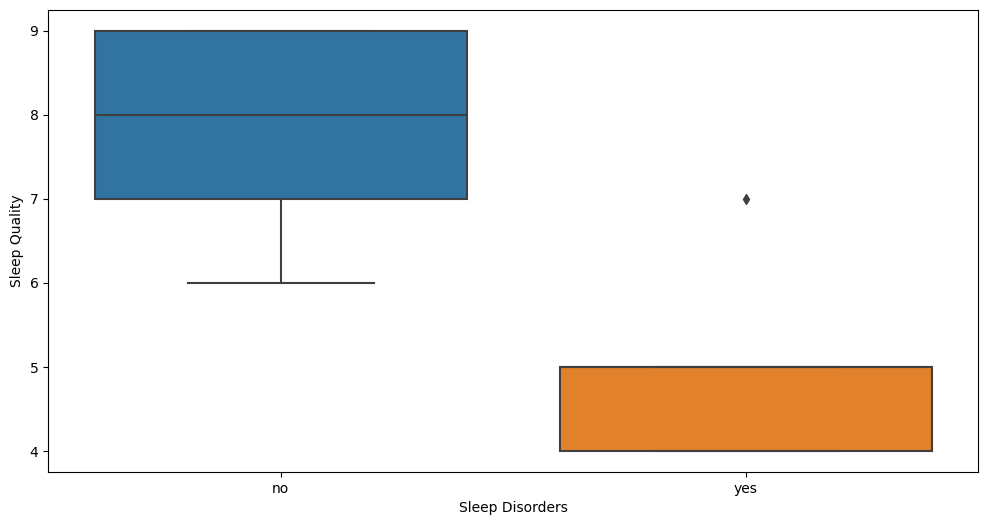

In [42]:
plt.figure(figsize = (12,6))
sns.boxplot (x="Sleep Disorders", y="Sleep Quality", data=df)
plt.show()

In [43]:
df_numeric_features = df.select_dtypes(include = ['int64', 'float64'])
df_numeric_features.head()

,Age,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Sleep Duration Hours
0,25,8,23.00,6.50,8000,2500,2,7.5
1,34,7,0.50,7.00,5000,2200,1,6.5
2,29,9,22.75,6.75,9000,2700,3,8.0
3,41,5,1.00,6.50,4000,2100,1,5.5
4,22,8,23.50,7.00,10000,2800,3,7.5


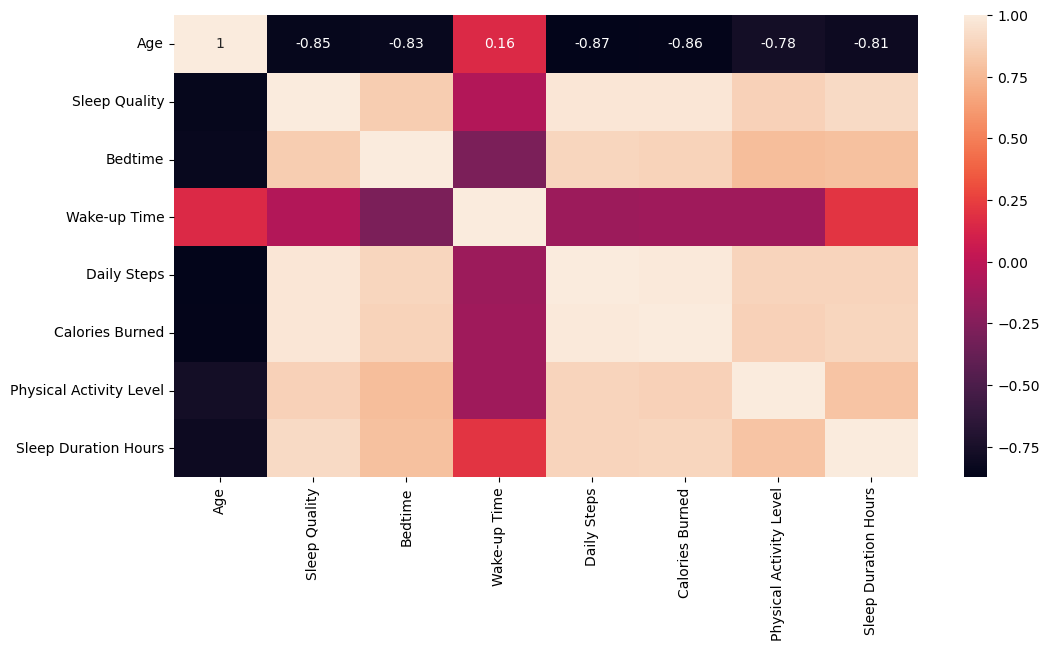

In [46]:
plt.figure(figsize = (12,6))
sns.heatmap(df_numeric_features.corr(), annot = True)
plt.show()

In [47]:
# AMOUNT OF CALORIES BURNT VS SLEEP QUALITY

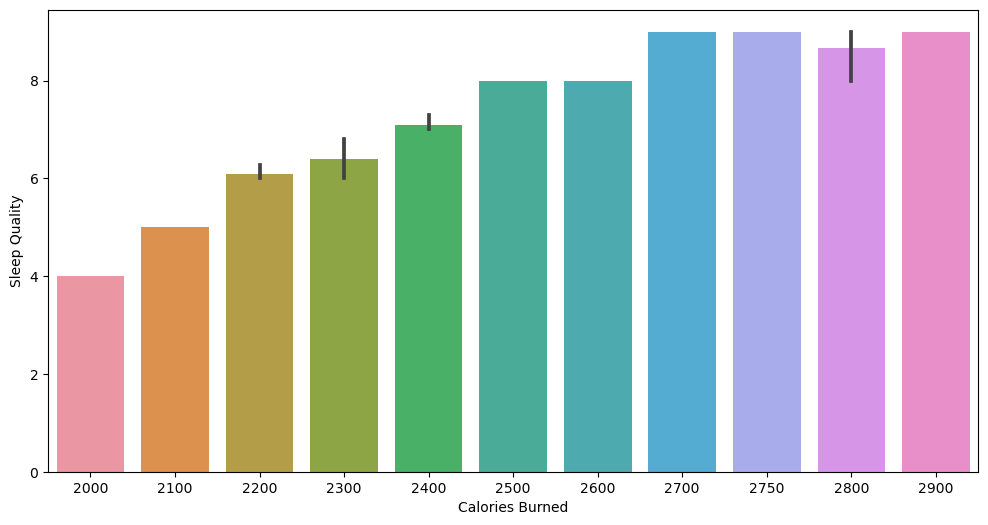

In [48]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Calories Burned', y = 'Sleep Quality', data = df)
plt.show()

In [49]:
model = LinearRegression()

X = df[['Calories Burned']]
Y = df['Sleep Quality']

model.fit(X, Y)

LinearRegression()

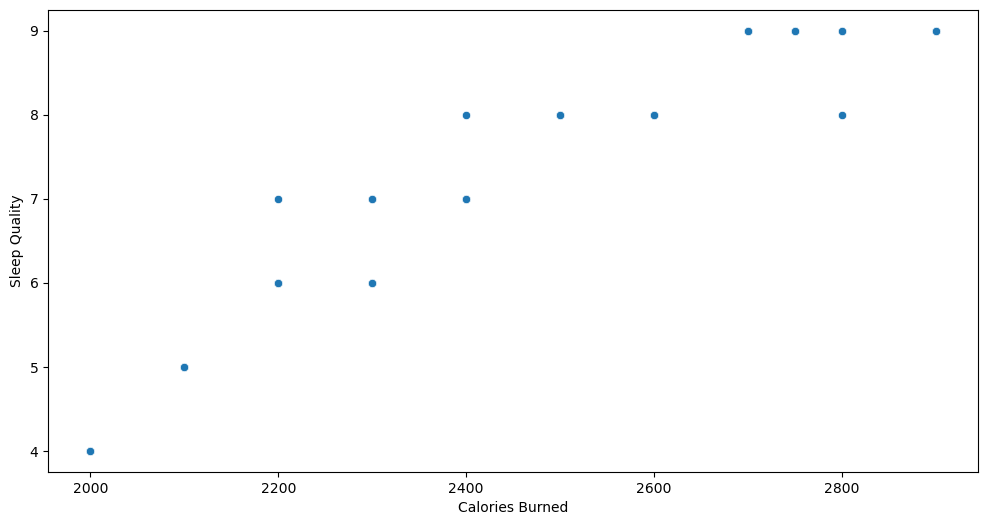

In [50]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'Calories Burned', y = 'Sleep Quality', data = df)
plt.show()

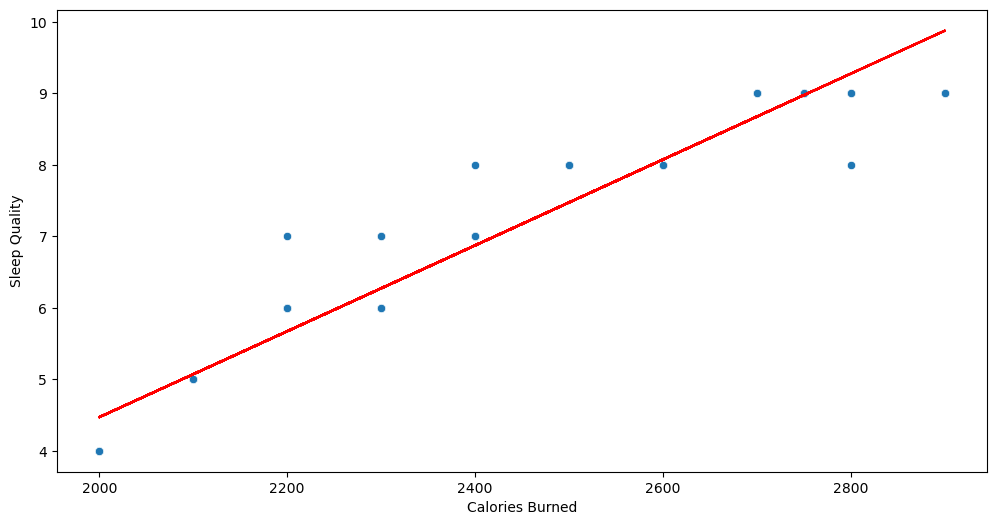

In [51]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'Calories Burned', y = 'Sleep Quality', data = df)
plt.plot(X, model.predict(X), color = 'red')
plt.show()